<a href="https://colab.research.google.com/github/Combatline12/Capstone-3-Used-Car-Analysis/blob/main/Used_Car_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Car Analysis

###Information regarding dataset
For this analysis I collected data from: https://www.kaggle.com/datasets/shubham1kumar/usedcar-data. This dataset is made up of 7,907 observations and 17 fields. The data was collected from a consulting firm located in India and lists each vehicle and other various factors. 

The fields for this dataset include:


1. **Sales_ID** (Sales ID)
2. **name** (Name of the used car)
3. **year** (Year of the car purchase)
4. **selling_price** (Current selling price for used car)
5. **km_driven** (Total km driven)
6. **Region** (Region where it is used)
7. **State or Province** (State or Province where it is used)
8. **City** (City where it is used)
9. **fuel** (Fuel type)
10. **seller_type** (Who is selling the car)
11. **transmission** (Transmission type of the car)
12. **owner** (Owner type)
13. **mileage** (Mileage of the car)
14. **engine** (engine power)
15. **max_power** (max power)
16. **seats** (Number of seats)
17. **sold** (used car sold or not



###Research Questions
For my analysis I have developed two questions:
> 1. Is there a correlation between the year the vehicle was made and the distance(miles) driven?


> 2. Is there a significant difference in the selling price of a vehicle based on if the seller is a dealer or an individual?




##Importing the Data and Tools

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing tools for Analysis
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy import stats
import seaborn as sns
import math
sns.set()

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Exploring Dataframe

In [ ]:
# Importing and creating dataframe
Car_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Project.csv')

In [ ]:
# Size of dataframe
Car_df.shape

(7906, 18)

In [ ]:
# Preliminary information about data
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

It appears there are no null values

In [ ]:
# Checking for duplicate rows
Car_df.duplicated().sum()

0

In [ ]:
# Displaying first 5 rows
Car_df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


##Data Wrangling

In [ ]:
#Converting distance driven to miles and selling price to USD
Car_df = Car_df.assign(miles_driven = (0.62 * Car_df.km_driven))
Car_df = Car_df.assign(Price = (0.013 * Car_df.selling_price))
Car_df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,miles_driven,Price
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y,90210.0,5850.0
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y,74400.0,4810.0
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y,86800.0,2054.0
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y,78740.0,2925.0
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y,74400.0,1690.0


##Observations

In [ ]:
#Descriptive statistics of the dataset
Car_df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,miles_driven,Price
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7.906000e+03,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,4.289697e+04,8447.578371
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208,3.521122e+04,10576.575729
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,6.200000e-01,389.987000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,2.170000e+04,3510.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,3.720000e+04,5850.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,5.916350e+04,8970.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.463483e+06,130000.000000


In [ ]:
#Number of values for each seller
Car_df['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

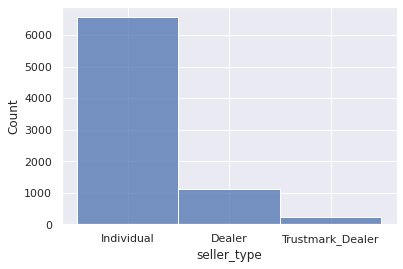

In [ ]:
ax = sns.histplot(Car_df['seller_type'])

There is an imbalance in the data with 6,563 individual compared to only 1,107 dealers

##Hypothesis

1. There is a correlation between the year a car was made and the miles driven 

2. The type of seller significantly impacts the selling price of a vehicle 

###Hypothesis 1

To either support or reject hypothesis 1, a scatterplot showcasing the correlation will be used as well as calculating the Pearson correlation coefficent. The coefficent is a valuse between 1 and -1. A 1 represents a strong positive relationship, a -1 is a strong negative relationship, and a 0 is no relationship.  

In [ ]:
#Calculating the Pearson correlation coefficent 
stats.pearsonr(Car_df['year'], Car_df['miles_driven'])


(-0.4285484826194228, 0.0)

The correlation coeffiecent between the year and miles driven on a vehicle is -0.43 with a p-value of < 0.05, meaning that the correlation between the two variables is significant. 

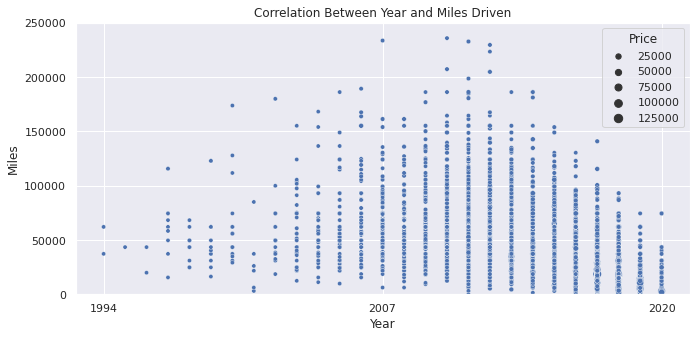

In [ ]:
#Visualization of Correlation
plt.figure(figsize = (11,5))
sns.scatterplot(y='miles_driven', x='year', size='Price', data=Car_df)
plt.xticks([1994, 2007, 2020])
plt.xlabel('Year')
plt.ylim(0,250000)
plt.ylabel('Miles')
plt.title('Correlation Between Year and Miles Driven')
plt.show()

While the scatterplot shows a relatively moderate correlation, the correlation coefficent and p-value point towards a stronger correlation between miles driven and year made. **Hypothesis Supported**

##Hypothesis 2

For hypothesis 2, an independent samples t - test will be run to determine if there is or isnt a significant difference between sellers relative to sale price.

Null and Alternative Hypothesis:

**H₀: µ₁ = µ₂**(There IS NOT a significant difference in price between sellers and
dealers)

**Hₐ: µ₁ ≠ µ₂**(There IS a significant difference in price between sellers and dealers)

In [ ]:
#Mean Prices For Sellers
Car_df.groupby('seller_type').mean()['Price']

seller_type
Dealer              18978.825150
Individual           6600.175706
Trustmark_Dealer    10423.906780
Name: Price, dtype: float64

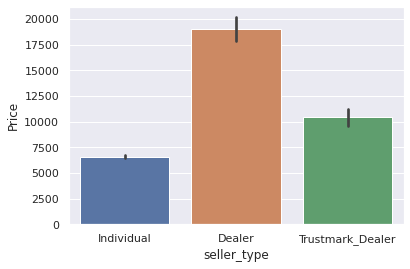

In [ ]:
#Visualization of Mean Price
sns.barplot(data=Car_df, x='seller_type', y='Price')

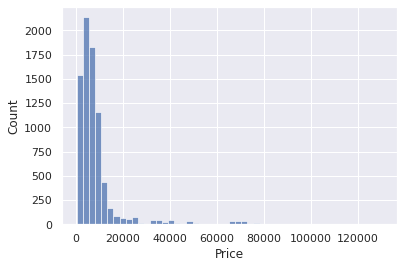

In [ ]:
#Visualizing Price Distribution
sns.histplot(Car_df['Price'], bins=50)

The majority of vehicles seem to be between 0 and 20,000 USD according to the histogram.

In [ ]:
#Creating test groups
Seller_in = Car_df[(Car_df['seller_type'] == 'Individual').values]
Seller_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6563 entries, 0 to 7905
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           6563 non-null   int64  
 1   name               6563 non-null   object 
 2   year               6563 non-null   int64  
 3   selling_price      6563 non-null   int64  
 4   km_driven          6563 non-null   int64  
 5   Region             6563 non-null   object 
 6   State or Province  6563 non-null   object 
 7   City               6563 non-null   object 
 8   fuel               6563 non-null   object 
 9   seller_type        6563 non-null   object 
 10  transmission       6563 non-null   object 
 11  owner              6563 non-null   object 
 12  mileage            6563 non-null   float64
 13  engine             6563 non-null   int64  
 14  max_power          6563 non-null   float64
 15  torque             6563 non-null   object 
 16  seats              6563 

In [ ]:
Seller_dl = Car_df[(Car_df['seller_type'] == 'Dealer').values]
Seller_dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 40 to 7844
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           1107 non-null   int64  
 1   name               1107 non-null   object 
 2   year               1107 non-null   int64  
 3   selling_price      1107 non-null   int64  
 4   km_driven          1107 non-null   int64  
 5   Region             1107 non-null   object 
 6   State or Province  1107 non-null   object 
 7   City               1107 non-null   object 
 8   fuel               1107 non-null   object 
 9   seller_type        1107 non-null   object 
 10  transmission       1107 non-null   object 
 11  owner              1107 non-null   object 
 12  mileage            1107 non-null   float64
 13  engine             1107 non-null   int64  
 14  max_power          1107 non-null   float64
 15  torque             1107 non-null   object 
 16  seats              1107

In [ ]:
#Running ttest
stats.ttest_ind(Seller_in['Price'], Seller_dl['Price'])

Ttest_indResult(statistic=-39.101605127724035, pvalue=4.0955302815811377e-305)

In [ ]:
#Calculating confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(Seller_in['Price'],Seller_dl['Price'])


'The difference in means at the 95% confidence interval (two-tail) is between 11161.544146638631 and 13595.754740807219.'

The smaller the p-value, the greater the statistical significance of the observed difference. The p value for the observed difference of the t-test is very small at 4.09 e-305 with a 95% level of confidence, indicating a significant difference. Therefore there is sufficent evidence to reject the null hypothesis. 

##Recomendations

My recomendations after analyzing the data would be that when shopping used vehicles, buy from an individual seller. The mean selling price for an individual is 6,600 USD compared to the mean price for a dealer at 18,978 USD. Also the miles driven on a vehicle and the year it was made should be taken into consideration as well. The size of the circles on the scatterplot represent the price of the vehicle. The bigger the circle, the higher the price of the vehicle. The larger sized circles can be seen towards the right of the scatterplot where the newest vehicles with the least amount of miles are. 